### algo Evaluation

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.duplicated().sum()

0

#### seperate x and y

In [6]:
x = df.drop(columns=['PassengerId', 'Name', 'Cabin', 'Survived'])
y = df[['Survived']]

In [7]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,female,35.0,1,0,113803,53.1000,S
4,3,male,35.0,0,0,373450,8.0500,S


In [8]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [12]:
cat = list(x.columns[x.dtypes=='object'])
con = list(x.columns[x.dtypes!='object'])

In [13]:
cat,con

(['Sex', 'Ticket', 'Embarked'], ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

#### create a preprocessing pipeline

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [10]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [11]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output  =False))])

In [14]:
pre = ColumnTransformer([('con', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [15]:
x_pre = pre.fit_transform(x)
x_pre.head()

,con__Pclass,con__Age,con__SibSp,con__Parch,con__Fare,cat__Sex_female,cat__Sex_male,cat__Ticket_110152,cat__Ticket_110413,cat__Ticket_110465,...,cat__Ticket_W./C. 14263,cat__Ticket_W./C. 6607,cat__Ticket_W./C. 6608,cat__Ticket_W./C. 6609,cat__Ticket_W.E.P. 5734,cat__Ticket_W/C 14208,cat__Ticket_WE/P 5735,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Apply train test split

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.3, random_state=42)

In [17]:
xtrain.shape

(623, 691)

In [18]:
ytrain.shape

(623, 1)

In [19]:
xtest.shape

(268, 691)

In [20]:
ytest.shape

(268, 1)

#### preprocessing completed here

#### now go for algorithm evaluation using a dictionary
1. KNN and SVM shoud be used for small datasets only where data is below 1000 rows
2. here data is below 1000 rows
3. here we opt for classification as distict values 0,1 in y data

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [23]:
dct = {
        'Logistic' : LogisticRegression(),
        'Decision Tree' : DecisionTreeClassifier(),
        'Random Forest' : RandomForestClassifier(),
        'Gradient Boosting' : GradientBoostingClassifier(), 
        'KNN' : KNeighborsClassifier(),
        'SVC' : SVC()
      }

In [25]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boosting', GradientBoostingClassifier()), ('KNN', KNeighborsClassifier()), ('SVC', SVC())])

In [26]:
dct.keys()

dict_keys(['Logistic', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN', 'SVC'])

#### Fit the model and evaluate the results
Evaluate model with f1 score

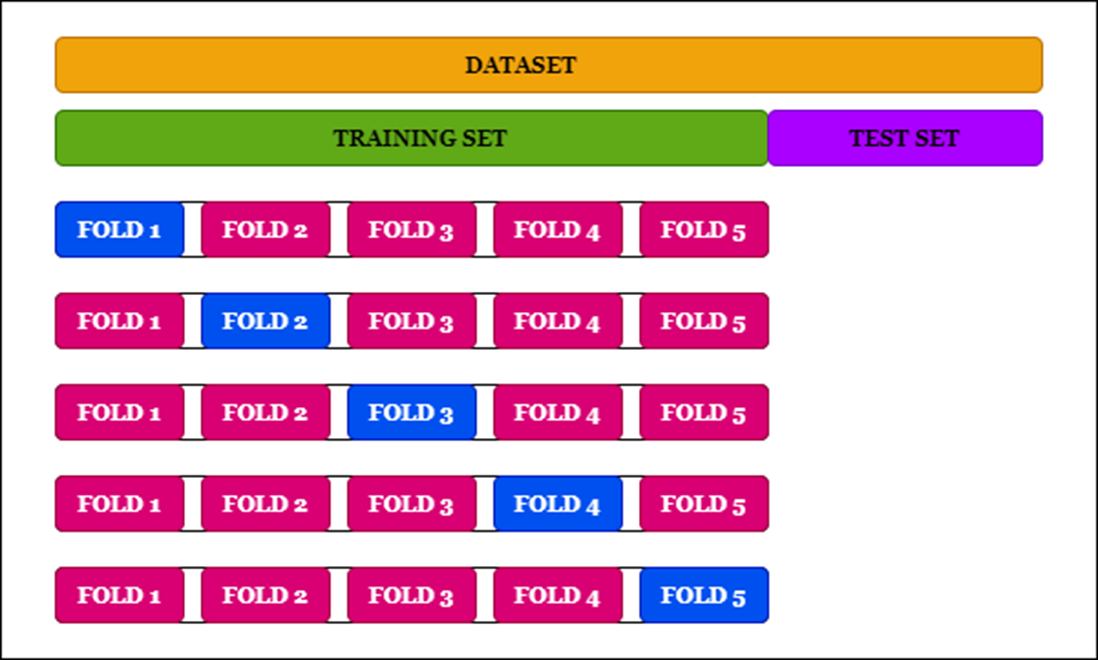

In [27]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [28]:
tr = []
ts = []
tr_cv = []

In [31]:
for name,model in dct.items():
    #fit the model
    model.fit(xtrain,ytrain)
    #predict results for train and test
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    #calculate f1 score in training and testing
    f1_tr = f1_score(ytrain,ypred_tr)
    f1_ts = f1_score(ytest,ypred_ts)
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
    f1_cv = scores.mean()
    # Append above results in tr, ts, tr_cv
    tr.append(f1_tr)
    ts.append(f1_ts)
    tr_cv.append(f1_cv)
    # Print above results for each model
    print(f'Model name : {name}\n')
    print(f'Train F1 : {f1_tr:.4f}')
    print(f'Train F1 Cross Validated : {f1_cv:.4f}')
    print(f'Test F1 : {f1_ts:.4f}')
    print('\n=========================================================================\n')



Model name : Logistic

Train F1 : 0.8019
Train F1 Cross Validated : 0.7920
Test F1 : 0.7678


Model name : Decision Tree

Train F1 : 0.9978
Train F1 Cross Validated : 0.7995
Test F1 : 0.7264


Model name : Random Forest

Train F1 : 0.9978
Train F1 Cross Validated : 0.8088
Test F1 : 0.7437


Model name : Gradient Boosting

Train F1 : 0.8107
Train F1 Cross Validated : 0.8033
Test F1 : 0.7216


Model name : KNN

Train F1 : 0.7846
Train F1 Cross Validated : 0.7671
Test F1 : 0.7389


Model name : SVC

Train F1 : 0.7917
Train F1 Cross Validated : 0.8046
Test F1 : 0.7788




In [32]:
tr

[0.8018648018648019,
 0.9978308026030369,
 0.9978308026030369,
 0.8106796116504853,
 0.7845804988662131,
 0.7916666666666667]

In [33]:
ts

[0.7677725118483413,
 0.7263681592039801,
 0.743718592964824,
 0.7216494845360825,
 0.7389162561576353,
 0.7788461538461539]

In [34]:
tr_cv

[0.7920146111376403,
 0.7995264263216095,
 0.8087993522973049,
 0.8032675425212265,
 0.767141555661023,
 0.8046058212138283]

In [35]:
dct

{'Logistic': LogisticRegression(),
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Gradient Boosting': GradientBoostingClassifier(),
 'KNN': KNeighborsClassifier(),
 'SVC': SVC()}

In [37]:
dct.keys()

dict_keys(['Logistic', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN', 'SVC'])

In [39]:
# results in dictionary format
results_dct = {
                'Model_name' : list(dct.keys()),
                'Train f1' : tr,
                'test f1' : ts,
                'Cv f1' : tr_cv
              }

In [40]:
results_df = pd.DataFrame(results_dct)
results_df

,Model_name,Train f1,test f1,Cv f1
0,Logistic,0.801865,0.767773,0.792015
1,Decision Tree,0.997831,0.726368,0.799526
2,Random Forest,0.997831,0.743719,0.808799
3,Gradient Boosting,0.810680,0.721649,0.803268
4,KNN,0.784580,0.738916,0.767142
5,SVC,0.791667,0.778846,0.804606


In [41]:
results_df = results_df.sort_values(by='test f1',ascending=False)
results_df

,Model_name,Train f1,test f1,Cv f1
5,SVC,0.791667,0.778846,0.804606
0,Logistic,0.801865,0.767773,0.792015
2,Random Forest,0.997831,0.743719,0.808799
4,KNN,0.784580,0.738916,0.767142
1,Decision Tree,0.997831,0.726368,0.799526
3,Gradient Boosting,0.810680,0.721649,0.803268


#### so we will be using SVC model as per the fa score

### create the SVC model

In [45]:
best_model = SVC(probability=True)
best_model.fit(xtrain,ytrain)

SVC(probability=True)

In [46]:
best_model.score(xtrain,ytrain)

0.85553772070626

In [47]:
best_model.score(xtest,ytest)

0.8283582089552238

#### Predict the results in train and test data

In [48]:
ypred_tr = best_model.predict(xtrain)
ypred_ts = best_model.predict(xtest)

In [49]:
ypred_tr[0:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [50]:
ypred_ts[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

#### create a confusion matrix

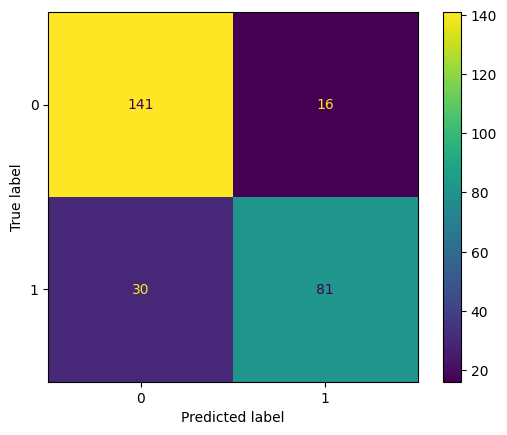

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_model.classes_)
cfd.plot()

#### print classification report

In [52]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       157
           1       0.84      0.73      0.78       111

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268

